In [96]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [297]:
df = pd.read_csv('ACC_minute_data_with_indicators.csv')

In [298]:
df = df[['date' , 'close','high' , 'low' , 'open' , 'volume']]

In [299]:
df

date    close     high      low     open  volume
0       2015-02-02 10:18:00+05:30  1544.00  1545.00  1543.10  1545.00     220
1       2015-02-02 10:19:00+05:30  1543.70  1544.00  1543.00  1544.00      29
2       2015-02-02 10:20:00+05:30  1543.00  1543.70  1542.50  1543.70      28
3       2015-02-02 10:21:00+05:30  1542.30  1543.00  1542.30  1543.00     125
4       2015-02-02 10:22:00+05:30  1542.10  1542.15  1541.10  1541.10     113
...                           ...      ...      ...      ...      ...     ...
660528  2022-10-24 19:10:00+05:30  2255.00  2255.90  2254.55  2255.80     199
660529  2022-10-24 19:11:00+05:30  2255.95  2255.95  2254.55  2255.75     227
660530  2022-10-24 19:12:00+05:30  2256.25  2256.25  2255.35  2256.00     594
660531  2022-10-24 19:13:00+05:30  2255.00  2255.95  2254.55  2255.50     267
660532  2022-10-24 19:14:00+05:30  2256.00  2259.00  2254.00  2255.00     365

[660533 rows x 6 columns]

In [315]:
# (43//5  +1)*5

a = 40
if a%5 != 0:
    print((a//5  +1)*5)
    
else:
    print(a)
    

40


In [213]:
# Chalne wala code hai
# ------------------------------


In [223]:
# for wala reliable code

def resample_to_constant_volume(df, volume_per_candle):
    # sort by time
    #df = df.sort_values(by='time')
    # create cumulative volume column
    df['cumulative_volume'] = df['volume'].cumsum()
    print(len(df))
    # initialize the new dataframe to hold resampled data
    resampled_df = pd.DataFrame(columns=['open', 'high', 'low', 'close', 'volume'])
    
    start_index = 0
    end_index = 0
    cumulative_volume = 0
    for i in range(len(df)):
        cumulative_volume += df.iloc[i]['volume']
        end_index = i
        if cumulative_volume >= volume_per_candle:
            candle_df = df.iloc[start_index:end_index+1]
            open_price = candle_df.iloc[0]['open']
            high_price = candle_df['high'].max()
            low_price = candle_df['low'].min()
            close_price = candle_df.iloc[-1]['close']
            resampled_df = resampled_df.append({'open': open_price, 'high': high_price, 'low': low_price, 'close': close_price, 'volume': cumulative_volume}, ignore_index=True)
            cumulative_volume = 0
            start_index = end_index + 1
    
    if start_index < len(df):
        candle_df = df.iloc[start_index:len(df)]
        open_price = candle_df.iloc[0]['open']
        high_price = candle_df['high'].max()
        low_price = candle_df['low'].min()
        close_price = candle_df.iloc[-1]['close']
        resampled_df = resampled_df.append({'open': open_price, 'high': high_price, 'low': low_price, 'close': close_price, 'volume': volume_per_candle}, ignore_index=True)

    return resampled_df

In [300]:
# df1 = df.iloc[249971:250000]  #for
# df2 = df.iloc[249971:254674] #while 
df1 = df.iloc[249971:554674]

In [301]:
df1 = df1.reset_index()
# df2 = df2.reset_index()


In [303]:
df1
# df1.head(20)

index                       date    close     high      low     open  \
0       249971  2018-01-01 09:15:00+05:30  1760.00  1763.90  1758.65  1763.90   
1       249972  2018-01-01 09:16:00+05:30  1763.80  1763.80  1760.00  1760.00   
2       249973  2018-01-01 09:17:00+05:30  1760.10  1763.45  1760.00  1763.45   
3       249974  2018-01-01 09:18:00+05:30  1759.35  1760.45  1759.35  1760.10   
4       249975  2018-01-01 09:19:00+05:30  1758.65  1759.90  1758.65  1759.35   
...        ...                        ...      ...      ...      ...      ...   
304698  554669  2021-07-28 15:24:00+05:30  2395.35  2395.65  2394.05  2395.65   
304699  554670  2021-07-28 15:25:00+05:30  2391.70  2396.75  2390.15  2395.35   
304700  554671  2021-07-28 15:26:00+05:30  2395.00  2395.35  2391.70  2391.70   
304701  554672  2021-07-28 15:27:00+05:30  2391.15  2395.00  2391.15  2394.95   
304702  554673  2021-07-28 15:28:00+05:30  2386.10  2394.60  2384.80  2391.15   

        volume  
0          718  
1          409  
2          867  
3         1065  
4          436  
...        ...  
304698    1576  
304699    2622  
304700    2092  
304701    1189  
304702    3110  

[304703 rows x 7 columns]

In [242]:
df1['cum_vol'] = df1['volume'].cumsum()

In [295]:
df1

Empty DataFrame
Columns: [index, open, high, low, close, volume]
Index: []

In [304]:
df1['volume'].describe()

count    304703.000000
mean       2390.218019
std        6027.550574
min           0.000000
25%         446.000000
50%        1125.000000
75%        2606.000000
max      930263.000000
Name: volume, dtype: float64

In [251]:
df.describe()

close           high            low           open  \
count  660533.000000  660533.000000  660533.000000  660533.000000   
mean     1647.463103    1648.378130    1646.548347    1647.469821   
std       328.577858     328.764984     328.380671     328.578274   
min       896.500000     899.100000     895.150000     896.000000   
25%      1419.250000    1420.000000    1418.550000    1419.300000   
50%      1565.650000    1566.500000    1565.000000    1565.650000   
75%      1766.450000    1767.300000    1765.500000    1766.500000   
max      2782.650000    2785.000000    2762.000000    2785.000000   

              volume  
count  660533.000000  
mean     1681.772802  
std      4955.211234  
min         0.000000  
25%       243.000000  
50%       675.000000  
75%      1720.000000  
max    962709.000000

In [307]:
# 4 times the 90% of 1 min data volume: 1 volume candle consist of 4 x 1 min candle 
df1.volume.quantile(0.90)*4

21240.0

In [228]:
resample_to_constant_volume(df1,4000)

4703


open     high      low    close  volume
0     1763.9   1763.9   1758.5   1758.5  4086.0
1     1758.5  1759.45   1748.7   1751.8  6300.0
2     1751.8  1753.05   1748.0   1748.5  4168.0
3     1748.5   1750.9   1746.7   1748.6  4179.0
4     1748.6  1750.35   1746.7   1747.0  4077.0
..       ...      ...      ...      ...     ...
573   1822.0   1823.6  1819.25  1820.55  4528.0
574  1820.55   1823.6   1819.0   1820.0  4400.0
575   1820.0   1822.5  1819.15   1820.1  4387.0
576   1820.1  1824.75   1819.2   1819.4  4262.0
577  1819.35  1821.85  1819.25   1821.5  4000.0

[578 rows x 5 columns]

In [238]:
df1

index                       date    close     high      low     open  \
0     249971  2018-01-01 09:15:00+05:30  1760.00  1763.90  1758.65  1763.90   
1     249972  2018-01-01 09:16:00+05:30  1763.80  1763.80  1760.00  1760.00   
2     249973  2018-01-01 09:17:00+05:30  1760.10  1763.45  1760.00  1763.45   
3     249974  2018-01-01 09:18:00+05:30  1759.35  1760.45  1759.35  1760.10   
4     249975  2018-01-01 09:19:00+05:30  1758.65  1759.90  1758.65  1759.35   
...      ...                        ...      ...      ...      ...      ...   
4698  254669  2018-01-22 12:33:00+05:30  1823.50  1823.50  1822.95  1822.95   
4699  254670  2018-01-22 12:34:00+05:30  1823.40  1823.90  1823.40  1823.50   
4700  254671  2018-01-22 12:35:00+05:30  1823.95  1823.95  1823.15  1823.95   
4701  254672  2018-01-22 12:36:00+05:30  1819.40  1824.75  1819.20  1824.00   
4702  254673  2018-01-22 12:37:00+05:30  1821.50  1821.85  1819.25  1819.35   

      volume  cum_vol  cumulative_volume  
0        718      718                718  
1        409     1127               1127  
2        867     1994               1994  
3       1065     3059               3059  
4        436     3495               3495  
...      ...      ...                ...  
4698     198  3417915            3417915  
4699     168  3418083            3418083  
4700     243  3418326            3418326  
4701    1050  3419376            3419376  
4702    2440  3421816            3421816  

[4703 rows x 9 columns]

In [145]:
# def resample_to_constant_volume(df, volume_per_candle):
#     # sort by time
#     #df = df.sort_values(by='time')
#     # create cumulative volume column
#     df['vol'] = df['volume']
#     df['cumulative_volume'] = df['vol'].cumsum()
#     print(len(df))
#     # initialize the new dataframe to hold resampled data
# #     resampled_df = pd.DataFrame(columns=['open', 'high', 'low', 'close', 'volume',"time"])
    
#     start_index = 0
#     while start_index < len(df):
#         end_index = start_index
#         cumulative_volume = 0#df.iloc[end_index]['vol']
#         while cumulative_volume < volume_per_candle and end_index < len(df) - 1:
#             #print(end_index)
#             end_index += 1
#             cumulative_volume = df.iloc[end_index]['cumulative_volume'] - df.iloc[start_index]['cumulative_volume']
#         #print("fdv")
        
#         candle_df = df.iloc[start_index:end_index+1]
#         open_price = candle_df.iloc[0]['open']
#         high_price = candle_df['high'].max()
#         low_price = candle_df['low'].min()
#         close_price = candle_df.iloc[-1]['close']
# #         date_time = str(df.iloc[end_index]["date"]) + " " + df.iloc[end_index]["time"]
#         resampled_df = df.append({'open': open_price, 'high': high_price, 'low': low_price, 'close': close_price, 'volume': cumulative_volume}, ignore_index=True)
#         if df.iloc[len(df)-1]['cumulative_volume'] - df.iloc[end_index]['cumulative_volume'] < volume_per_candle:
#             candle_df = df.iloc[end_index:len(df)]
#             open_price = candle_df.iloc[0]['open']
#             high_price = candle_df['high'].max()
#             low_price = candle_df['low'].min()
#             close_price = candle_df.iloc[-1]['close']
#             resampled_df = resampled_df.append({'open': open_price, 'high': high_price, 'low': low_price, 'close': close_price, 'volume': volume_per_candle}, ignore_index=True)
#             break
#         start_index = end_index
#     return resampled_df

In [137]:
df['volume'].mean()

1681.7728016616884

<AxesSubplot:>

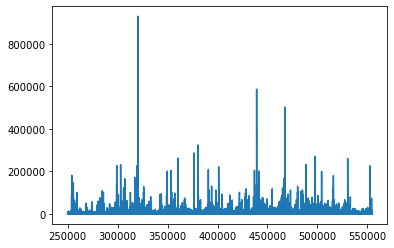

In [138]:
df1['volume'].plot()

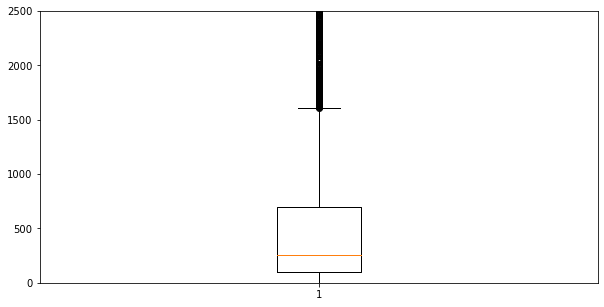

In [236]:
# plt.boxplot(df1['volume'], notch=None, vert=None, patch_artist=None, widths=None)

# import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

ax.boxplot(a, notch=None, vert=None, patch_artist=None, widths=None)
ax.set( ylim=(0, 2500))
plt.show()

# widths=(1, 0.5, 1.2, 0.1)

In [234]:
a = df1['volume']

In [237]:
df1['volume'].max()

0        718
1        409
2        867
3       1065
4        436
        ... 
4698     198
4699     168
4700     243
4701    1050
4702    2440
Name: volume, Length: 4703, dtype: int64

In [235]:
a.describe()

count      4703.000000
mean        727.581544
std        3633.337458
min           0.000000
25%          97.000000
50%         253.000000
75%         701.000000
max      181742.000000
Name: volume, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


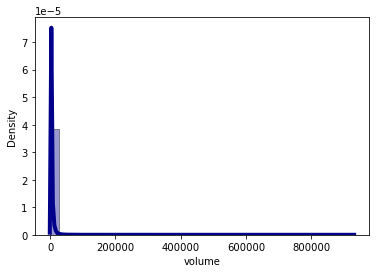

In [132]:
import seaborn as sns

sns.distplot(df1['volume'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [133]:
# datetime.datetime.strptime
# df1 = df[(df['date'] >datetime.date(2016,1,1))]

In [288]:
df1 = df.iloc[249971:554674]
# df1 = df.iloc[249971:264674]


In [286]:
# df1.describe()

open high  low close volume
count     0    0    0     0      0
unique    0    0    0     0      0
top     NaN  NaN  NaN   NaN    NaN
freq    NaN  NaN  NaN   NaN    NaN

In [290]:
len(df1)

0

In [291]:
df

open     high      low    close   volume
0       1763.9   1763.9   1756.0   1757.0   6248.0
1       1757.0   1757.0   1748.0   1749.0   6494.0
2       1749.0  1751.15   1746.7   1748.6   6170.0
3       1748.6  1750.35  1743.35  1745.35   7987.0
4      1745.35  1748.15  1744.05   1746.0   6074.0
...        ...      ...      ...      ...      ...
14897   2393.4  2395.95  2393.35   2394.0   7044.0
14898   2394.0   2397.0   2394.0  2396.95   6324.0
14899  2396.95   2397.1   2393.1   2394.7  12089.0
14900   2394.7  2396.75  2390.15   2391.7   6238.0
14901   2391.7  2395.35   2384.8   2386.1   6391.0

[75261 rows x 5 columns]

In [158]:
import warnings

warnings.filterwarnings('ignore')

In [278]:
# resample_to_constant_volume(df1,4000)

In [91]:
df.iloc[554674]

date      2021-07-28 15:29:00+05:30
close                        2392.0
low                          2386.0
open                         2386.1
volume                          846
Name: 554674, dtype: object

In [89]:
len(df)/7*6



566171.1428571428

In [284]:
df1

index                       date    close     high      low     open  \
0   249971  2018-01-01 09:15:00+05:30  1760.00  1763.90  1758.65  1763.90   
1   249972  2018-01-01 09:16:00+05:30  1763.80  1763.80  1760.00  1760.00   
2   249973  2018-01-01 09:17:00+05:30  1760.10  1763.45  1760.00  1763.45   
3   249974  2018-01-01 09:18:00+05:30  1759.35  1760.45  1759.35  1760.10   
4   249975  2018-01-01 09:19:00+05:30  1758.65  1759.90  1758.65  1759.35   
5   249976  2018-01-01 09:20:00+05:30  1758.50  1761.00  1758.50  1758.65   
6   249977  2018-01-01 09:21:00+05:30  1757.00  1759.45  1757.00  1758.50   
7   249978  2018-01-01 09:22:00+05:30  1758.00  1758.00  1756.00  1757.00   
8   249979  2018-01-01 09:23:00+05:30  1757.00  1758.00  1757.00  1758.00   
9   249980  2018-01-01 09:24:00+05:30  1754.80  1757.00  1754.60  1757.00   
10  249981  2018-01-01 09:25:00+05:30  1755.25  1756.35  1754.80  1754.80   
11  249982  2018-01-01 09:26:00+05:30  1753.65  1755.25  1753.65  1755.25   
12  249983  2018-01-01 09:27:00+05:30  1751.80  1754.00  1748.70  1753.65   
13  249984  2018-01-01 09:28:00+05:30  1753.05  1753.05  1750.30  1751.80   
14  249985  2018-01-01 09:29:00+05:30  1750.15  1752.55  1750.15  1752.55   
15  249986  2018-01-01 09:30:00+05:30  1750.00  1751.25  1750.00  1750.15   
16  249987  2018-01-01 09:31:00+05:30  1749.00  1750.00  1749.00  1750.00   
17  249988  2018-01-01 09:32:00+05:30  1749.00  1749.00  1748.00  1749.00   
18  249989  2018-01-01 09:33:00+05:30  1748.30  1749.00  1748.30  1749.00   
19  249990  2018-01-01 09:34:00+05:30  1749.40  1749.50  1748.30  1748.30   
20  249991  2018-01-01 09:35:00+05:30  1751.00  1751.00  1748.55  1749.20   
21  249992  2018-01-01 09:36:00+05:30  1748.50  1751.15  1748.50  1751.00   
22  249993  2018-01-01 09:37:00+05:30  1749.25  1749.85  1748.50  1748.50   
23  249994  2018-01-01 09:38:00+05:30  1749.25  1749.95  1748.45  1749.25   
24  249995  2018-01-01 09:39:00+05:30  1749.25  1749.30  1749.25  1749.25   
25  249996  2018-01-01 09:40:00+05:30  1749.50  1750.90  1749.25  1749.25   
26  249997  2018-01-01 09:41:00+05:30  1748.35  1749.50  1748.35  1749.50   
27  249998  2018-01-01 09:42:00+05:30  1748.00  1749.35  1748.00  1748.35   
28  249999  2018-01-01 09:43:00+05:30  1748.35  1749.20  1748.00  1748.00   

    volume  cum_vol  
0      718      718  
1      409     1127  
2      867     1994  
3     1065     3059  
4      436     3495  
5      591     4086  
6      397     4483  
7     1124     5607  
8      641     6248  
9      394     6642  
10     413     7055  
11     728     7783  
12    2603    10386  
13     773    11159  
14     245    11404  
15     551    11955  
16     194    12149  
17     593    12742  
18     196    12938  
19     467    13405  
20     465    13870  
21     684    14554  
22     379    14933  
23     321    15254  
24     315    15569  
25     307    15876  
26     802    16678  
27     571    17249  
28     448    17697

In [283]:
#Final acc data %ile = 0.95
df1.volume.quantile(0.95)




1100.3999999999999

In [263]:
df_18_21_1 = df.iloc[249971:300000]
df_18_21_2 = df.iloc[300000:350000]
df_18_21_3 =df.iloc[350000:400000]
df_18_21_4 = df.iloc[400000:450000]
df_18_21_5 =df.iloc[450000:500000]
df_18_21_6 = df.iloc[500000:554674]

In [265]:
df_18_21_tick_volume_1 = resample_to_constant_volume(df_18_21_1 ,6061 )

50029


In [266]:
df_18_21_tick_volume_2 = resample_to_constant_volume(df_18_21_2 ,6061 )

50000


In [267]:
df_18_21_tick_volume_3 = resample_to_constant_volume(df_18_21_3 ,6061 )

50000


In [268]:
df_18_21_tick_volume_4 = resample_to_constant_volume(df_18_21_4 ,6061 )

50000


In [269]:
df_18_21_tick_volume_5 = resample_to_constant_volume(df_18_21_5 ,6061 )

50000


In [270]:
df_18_21_tick_volume_6 = resample_to_constant_volume(df_18_21_6 ,6061 )

54674


In [272]:
df_18_21_tick_volume_1

open     high      low    close  volume
0      1763.9   1763.9   1756.0   1757.0  6248.0
1      1757.0   1757.0   1748.0   1749.0  6494.0
2      1749.0  1751.15   1746.7   1748.6  6170.0
3      1748.6  1750.35  1743.35  1745.35  7987.0
4     1745.35  1748.15  1744.05   1746.0  6074.0
...       ...      ...      ...      ...     ...
6977   1539.6   1539.7  1537.05   1539.0  6434.0
6978  1538.35   1544.0  1538.25   1544.0  7421.0
6979   1543.3  1543.95  1538.25  1538.75  6947.0
6980  1538.75   1543.0  1538.75   1542.5  6532.0
6981   1542.5  1543.25  1538.75   1538.9  6061.0

[6982 rows x 5 columns]

In [273]:

frames = [df_18_21_tick_volume_1, df_18_21_tick_volume_2 , df_18_21_tick_volume_3, df_18_21_tick_volume_4 , df_18_21_tick_volume_5 , df_18_21_tick_volume_6]

data_final = pd.concat(frames)

In [280]:
# data_final  = data_final.reset_index()
data_final

index     open     high      low    close   volume
0          0   1763.9   1763.9   1756.0   1757.0   6248.0
1          1   1757.0   1757.0   1748.0   1749.0   6494.0
2          2   1749.0  1751.15   1746.7   1748.6   6170.0
3          3   1748.6  1750.35  1743.35  1745.35   7987.0
4          4  1745.35  1748.15  1744.05   1746.0   6074.0
...      ...      ...      ...      ...      ...      ...
75256  14897   2393.4  2395.95  2393.35   2394.0   7044.0
75257  14898   2394.0   2397.0   2394.0  2396.95   6324.0
75258  14899  2396.95   2397.1   2393.1   2394.7  12089.0
75259  14900   2394.7  2396.75  2390.15   2391.7   6238.0
75260  14901   2391.7  2395.35   2384.8   2386.1   6391.0

[75261 rows x 6 columns]

In [281]:
import plotly.graph_objs as go
import pandas as pd

# df = data_final

data_final = pd.DataFrame(data_final)

# Create the candlestick chart
candlestick = go.Candlestick(x=data_final.index, open=data_final['open'], close=data_final['close'], high=data_final['high'], low=data_final['low'])
fig = go.Figure(data=[candlestick])

# Show the chart
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()